## SEPARATE PORTFOLIO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../raw_data/full_data_clean.xlsx', engine='openpyxl')

In [3]:
data.head()

,Unnamed: 0,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,170734,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
1,171773,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
2,167138,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
3,180517,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
4,149033,PAGADO,COLECTIVO,Dolor Abdominal Y Pelvico,EMERGENCIA,CLINICA,Miranda,F,47,29,14,2018-09-02,40-49,Ambulatorio


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
1,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
2,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
3,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
4,PAGADO,COLECTIVO,Dolor Abdominal Y Pelvico,EMERGENCIA,CLINICA,Miranda,F,47,29,14,2018-09-02,40-49,Ambulatorio


In [6]:
data.shape

(151251, 13)

In [7]:
print('total_amount:', data["amount"].sum())

total_amount: 97905791


In [8]:
data['insurance_type'].unique()

array(['INDIVIDUAL', 'COLECTIVO'], dtype=object)

## PORTFOLIO INDIVIDUAL 

In [9]:
data_indiv = data.query('insurance_type == "INDIVIDUAL"')

In [10]:
data_indiv.shape

(39432, 13)

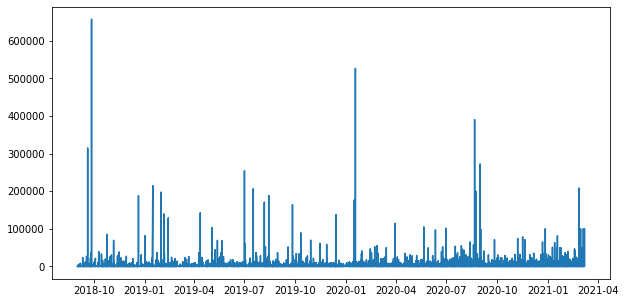

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data_indiv["date_issue"], data_indiv["amount"])

In [12]:
print('total_amount_indiv:', data_indiv["amount"].sum())
print('percentage_amount_indiv:', (data_indiv["amount"].sum() / data["amount"].sum()) * 100)

total_amount_indiv: 49113343
percentage_amount_indiv: 50.16387947879406


In [13]:
data_indiv.describe()

,age,country_id,amount
count,39432.000000,39432.000000,39432.000000
mean,42.092945,28.399244,1245.519958
std,21.765455,3.021139,7548.133962
min,0.000000,1.000000,0.000000
25%,28.000000,29.000000,39.000000
50%,43.000000,29.000000,108.000000
75%,59.000000,29.000000,507.000000
max,96.000000,46.000000,657312.000000


In [14]:
data_indiv_max = data_indiv.query('amount > 200000')

In [15]:
data_indiv_max.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
1048,PAGADO,INDIVIDUAL,Insuficiencia Cardiaca,REEMBOLSO,No Informado,Estado No Identificado,M,72,15,314479,2018-09-20,Mayor a 70,Hospitalización
1448,PAGADO,INDIVIDUAL,Lumbalgia,REEMBOLSO,No Informado,Estado No Identificado,F,61,29,657312,2018-09-27,60-69,Hospitalización
6957,PAGADO,INDIVIDUAL,Traumatismo Intracraneal,REEMBOLSO,No Informado,Estado No Identificado,M,79,15,214900,2019-01-16,Mayor a 70,Hospitalización
21583,PAGADO,INDIVIDUAL,Bronquitis Cronica-Enfisema (Epoc),REEMBOLSO,No Informado,Estado No Identificado,F,59,15,254392,2019-07-01,50-59,Hospitalización
23613,PAGADO,INDIVIDUAL,Cardiopatia Isquemica:Angina De Pecho-Infarto ...,REEMBOLSO,No Informado,Estado No Identificado,F,79,15,206108,2019-07-17,Mayor a 70,Hospitalización


#### *Remove amount > 200000*

In [16]:
data_indiv_homog = data_indiv.query('amount < 200000')

In [17]:
data_indiv_homog.shape

(39422, 13)

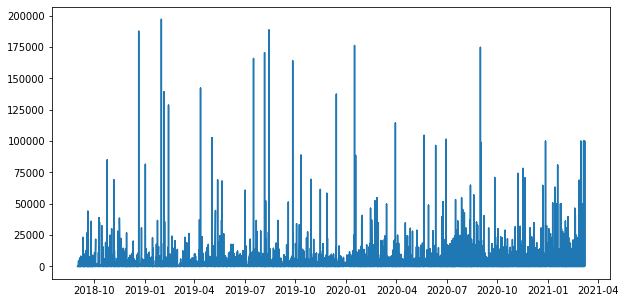

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(data_indiv_homog["date_issue"], data_indiv_homog["amount"])

In [19]:
data_indiv_homog

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
1,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
2,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
3,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
8,PAGADO,INDIVIDUAL,Gastritis (Simple),REEMBOLSO,No Informado,Estado No Identificado,M,26,29,18,2018-09-03,20-29,Hospitalización
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151241,PENDIENTE,INDIVIDUAL,"Luxaciones, Torcedura Y Esguinces Que Afectan ...",EMERGENCIA,CLINICA,Nueva Esparta,F,25,29,1243,2021-03-08,20-29,Ambulatorio
151242,PENDIENTE,INDIVIDUAL,Intoxicacion Alimentaria Bacteriana,EMERGENCIA,CLINICA,Lara,F,14,29,100000,2021-03-08,2019-10-01 00:00:00,Hospitalización
151246,PENDIENTE,INDIVIDUAL,Fiebre Del Dengue Clasico/Hemorragico,EMERGENCIA,CLINICA,Falcon,F,42,29,1351,2021-03-08,40-49,Hospitalización
151249,PENDIENTE,INDIVIDUAL,Neumonia Bacteriana/Viral,EMERGENCIA,CLINICA,Monagas,M,48,29,4962,2021-03-08,40-49,Hospitalización


In [20]:
data_indiv_homog.to_excel('../raw_data/data_indiv_full.xlsx', engine='xlsxwriter')

In [21]:
data_indiv_dayly = data_indiv_homog.groupby('date_issue', as_index = False).agg({'amount': 'sum'})
data_indiv_dayly.columns = ['date_issue','total_amount_claims']

In [22]:
data_indiv_dayly.shape

(919, 2)

<AxesSubplot:xlabel='date_issue'>

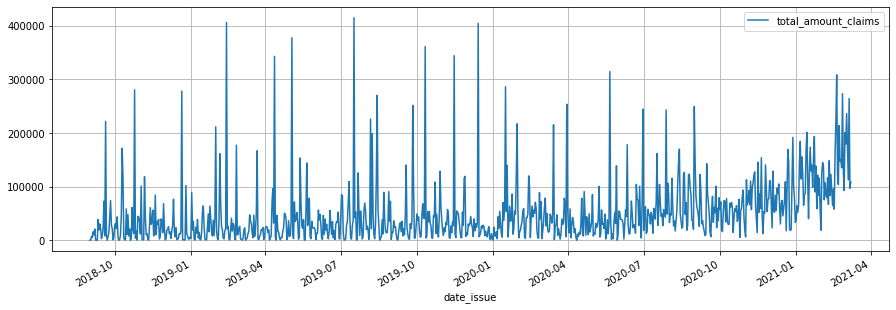

In [23]:
data_days_plotting = data_indiv_dayly.set_index('date_issue')
data_days_plotting.plot(grid=True, figsize=(15,5))

In [24]:
data_indiv_weekly = data_indiv_dayly.resample('W-Mon', on='date_issue').sum().reset_index().sort_values(by='date_issue')

In [25]:
data_indiv_weekly.shape

(132, 2)

In [26]:
data_indiv_weekly.to_excel('../raw_data/data_indiv_weekly.xlsx', engine='xlsxwriter')

## PORTFOLIO COLECTIVO

In [27]:
data_colec = data.query('insurance_type == "COLECTIVO"')

In [28]:
data_colec.shape

(111819, 13)

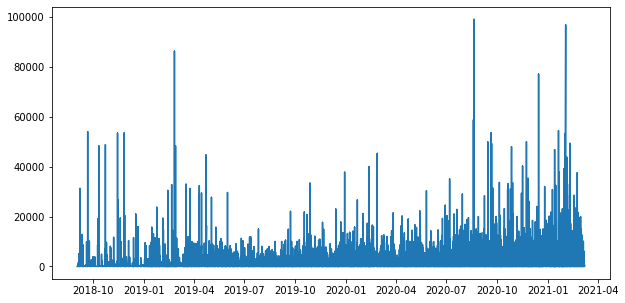

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(data_colec["date_issue"], data_colec["amount"])

In [30]:
print('total_amount_colect:', data_colec["amount"].sum())
print('percentage_amount_colect:', (data_colec["amount"].sum() / data["amount"].sum()) * 100)

total_amount_colect: 48792448
percentage_amount_colect: 49.83612052120594


In [31]:
data_colec.describe()

,age,country_id,amount
count,111819.000000,111819.000000,111819.000000
mean,45.708636,28.540946,436.352033
std,22.660106,3.785918,1679.856183
min,0.000000,1.000000,0.000000
25%,31.000000,29.000000,15.000000
50%,47.000000,29.000000,48.000000
75%,63.000000,29.000000,220.000000
max,100.000000,85.000000,99101.000000


In [32]:
data_colec_max = data_colec.query('amount > 60000')

In [33]:
data_colec_max

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
9756,PAGADO,COLECTIVO,Colico Nefritico/Calculo Renal,REEMBOLSO,No Informado,Estado No Identificado,F,40,15,86353,2019-02-25,40-49,Hospitalización
91074,PAGADO,COLECTIVO,Infeccion Viral - Covid 19,EMERGENCIA,CLINICA,Distrito Capital,M,72,29,99101,2020-08-20,Mayor a 70,Hospitalización
124856,PAGADO,COLECTIVO,Tumor Maligno De La Vejiga Urinaria,EMERGENCIA,CLINICA,Distrito Capital,M,77,29,77189,2020-12-15,Mayor a 70,Hospitalización
138950,PENDIENTE,COLECTIVO,Quemaduras De I-Ii-Iii Grado,EMERGENCIA,CLINICA,Distrito Capital,F,50,29,96947,2021-02-02,50-59,Hospitalización


#### *Remove amount > 60000*

In [34]:
data_colec_homog = data_colec.query('amount < 60000')

In [35]:
data_colec_homog.shape

(111815, 13)

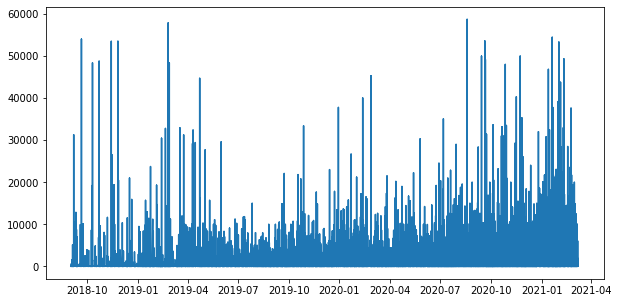

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(data_colec_homog["date_issue"], data_colec_homog["amount"])

In [ ]:
data_colec_homog

In [37]:
data_colec_homog.to_excel('../raw_data/data_colec_full.xlsx', engine='xlsxwriter')

In [38]:
data_colec_dayly = data_colec_homog.groupby('date_issue', as_index = False).agg({'amount': 'sum'})
data_colec_dayly.columns = ['date_issue','total_amount_claims']

In [39]:
data_colec_dayly.shape

(894, 2)

<AxesSubplot:xlabel='date_issue'>

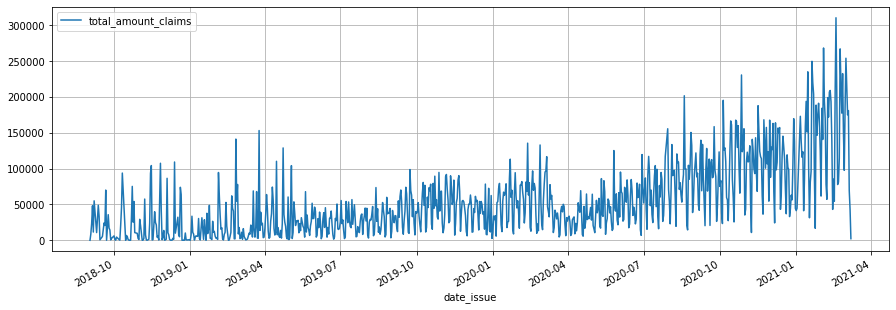

In [40]:
data_days_plotting_colec = data_colec_dayly.set_index('date_issue')
data_days_plotting_colec.plot(grid=True, figsize=(15,5))

In [41]:
data_colec_weekly = data_colec_dayly.resample('W-Mon', on='date_issue').sum().reset_index().sort_values(by='date_issue')

In [42]:
data_colec_weekly.shape

(132, 2)

In [43]:
data_colec_weekly.to_excel('../raw_data/data_colec_weekly.xlsx', engine='xlsxwriter')